# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10, 10))

In [ ]:
# Посчитайте средние значения в матрице по столбцам

m = A.mean(0)

In [ ]:
# Транспонируйте матрицу A

AT = A.transpose()

In [ ]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

cumm_prod = AT * A

In [ ]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A @ A

#### Не меняйте следующую ячейку. Просто запустите ее.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [ ]:
import pandas as pd

In [ ]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/master/homeworks/HW_1_Linclass_kNN/forest_dataset.csv

--2019-09-29 18:02:01--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/master/homeworks/HW_1_Linclass_kNN/forest_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1293856 (1.2M) [text/plain]
Saving to: ‘forest_dataset.csv’

forest_dataset.csv  100%[===================>]   1.23M  --.-KB/s    in 0.05s   

2019-09-29 18:02:01 (27.0 MB/s) - ‘forest_dataset.csv’ saved [1293856/1293856]



In [ ]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [ ]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [ ]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.2, random_state=42)

In [ ]:
two_class_std_scal = StandardScaler()
train_feature_matrix = two_class_std_scal.fit_transform(train_feature_matrix)
test_feature_matrix = two_class_std_scal.transform(test_feature_matrix)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [ ]:
lr_clf = LogisticRegression(penalty='l1', random_state=42, max_iter=5000, verbose=1, n_jobs=-1, solver='saga')

In [ ]:
lr_clf.fit(train_feature_matrix, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 495 epochs took 3 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=42,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [ ]:
pred_test_labels = lr_clf.predict(test_feature_matrix)

In [ ]:
#f1_score(train_labels, lr_clf.predict(train_feature_matrix))

In [ ]:
print(f'f1: {f1_score(test_labels, pred_test_labels)}')
print(f'accuracy: {accuracy_score(test_labels, pred_test_labels)}')

f1: 0.726039016115352
accuracy: 0.7645772594752187


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [ ]:
lr_clf = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000, verbose=1, n_jobs=-1, solver='saga', penalty='l1'))

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

#std_scal = StandardScaler()
#train_feature_matrix = std_scal.fit_transform(train_feature_matrix)
#test_feature_matrix = std_scal.transform(test_feature_matrix)

lr_clf.fit(train_feature_matrix, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 24 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.3s finished


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='multinomial', n_jobs=-1,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

In [ ]:
print(f1_score(test_labels, lr_clf.predict(test_feature_matrix), average='macro'))
print(f1_score(test_labels, lr_clf.predict(test_feature_matrix), average='micro'))

0.4997301401794302
0.72125


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
lr_clf = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', random_state=42, max_iter=100, verbose=1, n_jobs=-1, solver='saga'))

clf = GridSearchCV(cv=5,
       estimator=lr_clf,
       n_jobs=-1,
       param_grid={'logisticregression__penalty':['l1', 'l2'], 'logisticregression__C':np.linspace(0.01, 1, 10)},
       scoring='accuracy',
       verbose=1)

clf.fit(train_feature_matrix, train_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 3 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                     

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [ ]:
from matplotlib import pyplot as plt

results = clf.cv_results_
c_dict = {}
for i, param in enumerate(results['params']):
  c = param['logisticregression__C']
  if c not in c_dict.keys():
    c_dict[c] = {}
  scores = [results['split'+str(j)+'_test_score'][i] for j in range(clf.n_splits_)]
  c_dict[c][param['logisticregression__penalty']] = (np.mean(scores), np.std(scores))

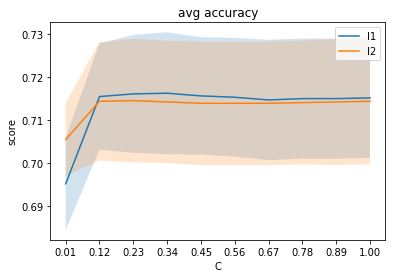

In [ ]:
fig = plt.figure()

plt.plot(list(c_dict.keys()), [value['l1'][0] for key, value in c_dict.items()], label='l1')
plt.fill_between(list(c_dict.keys()), [value['l1'][0]-value['l1'][1] for key, value in c_dict.items()],  [value['l1'][0]+value['l1'][1] for key, value in c_dict.items()], alpha=0.2)
plt.plot(list(c_dict.keys()), [value['l2'][0] for key, value in c_dict.items()], label='l2')
plt.fill_between(list(c_dict.keys()), [value['l2'][0]-value['l2'][1] for key, value in c_dict.items()],  [value['l2'][0]+value['l2'][1] for key, value in c_dict.items()], alpha=0.2)

plt.xlabel('C')
plt.xticks(list(c_dict.keys()))
plt.ylabel('score')

plt.title("avg accuracy")

plt.legend()

plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [ ]:
best_c = None
best_penalty = None
best_score = 0
for c, res in c_dict.items():
  for penalty, score in res.items():
    if score[0] > best_score:
      best_score = score[0]
      best_c = c
      best_penalty = penalty
print(best_c, best_penalty)

# alternative way
best_param = clf.best_params_
print(best_param['logisticregression__C'], best_param['logisticregression__penalty'])

0.34 l1
0.34 l1


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [ ]:
best_lr_clf = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', random_state=42, max_iter=5200, verbose=1, n_jobs=-1, solver='saga', penalty='l1', C=0.34))
best_lr_clf.fit(train_feature_matrix, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1837 epochs took 42 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   41.6s finished


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=0.34, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5200,
                                    multi_class='multinomial', n_jobs=-1,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=1,
                                    warm_start=False))],
         verbose=False)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [ ]:
from collections import Counter
import numpy as np
avg_prob = np.mean([x[y-1] for x, y in zip(best_lr_clf.predict_proba(test_feature_matrix), test_labels)])

rand_prob = np.mean(np.array(list(Counter(test_labels).values())) / test_labels.shape[0])

In [ ]:
avg_prob, rand_prob

(0.6111111840031009, 0.14285714285714285)

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_clf = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='auto', p=1, metric='minkowski', metric_params=None, n_jobs=-1)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(train_feature_matrix)
knn_clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=1,
                     weights='distance')

In [ ]:
#accuracy_score(test_labels, knn_clf.predict(scaler.transform(test_feature_matrix)))
print(accuracy_score(test_labels, knn_clf.predict((test_feature_matrix))))

0.7725


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

наличие категориальных признаков наталкивает на мысль, что вес точки должен быть пропорционален расстоянию до неё

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [ ]:
from sklearn.model_selection import LeavePOut
import random

clf = GridSearchCV(cv=LeavePOut(p=1),
       estimator=knn_clf,
       n_jobs=-1,
       param_grid={'n_neighbors':list(range(1,11)), 'weights':['distance']},
       scoring='accuracy',
       verbose=1)

rand_subset = random.sample(list(range(train_feature_matrix.shape[0])), train_feature_matrix.shape[0])
clf.fit(train_feature_matrix[rand_subset], train_labels[rand_subset])

Fitting 6400 folds for each of 10 candidates, totalling 64000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 9988 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 14388 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 16888 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 19588 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 22488 tasks  

GridSearchCV(cv=LeavePOut(p=1), error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=1, p=1,
                                            weights='distance'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
results = clf.cv_results_
n_dict = {}
for i, param in enumerate(results['params']):
  n_param = param['n_neighbors']
  scores = [results['split'+str(j)+'_test_score'][i] for j in range(clf.n_splits_)]
  n_dict[n_param] = (np.mean(scores), np.std(scores))

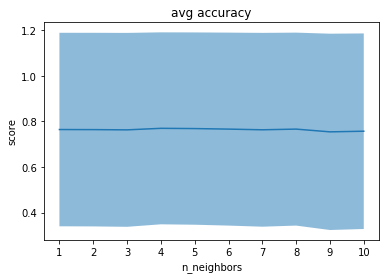

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()

plt.plot(list(n_dict.keys()), [value[0] for value in n_dict.values()])
plt.fill_between(list(n_dict.keys()), [value[0]+value[1] for value in n_dict.values()], [value[0]-value[1] for value in n_dict.values()], alpha=0.5)

plt.xlabel('n_neighbors')
plt.xticks(list(n_dict.keys()))
plt.ylabel('score')

plt.title("avg accuracy")

#plt.legend()

plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [ ]:
clf.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
best_n = 4#clf.best_params_['n_neighbors']
best_knn_clf = KNeighborsClassifier(n_neighbors=best_n, weights='distance', algorithm='auto', p=1, metric='minkowski', metric_params=None, n_jobs=-1)
best_knn_clf.fit(train_feature_matrix, train_labels)

avg_prob = np.mean([x[y-1] for x, y in zip(best_knn_clf.predict_proba(test_feature_matrix), test_labels)])

In [ ]:
avg_prob

0.693020414174269

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [ ]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=best_n, weights='distance')
best_knn_clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [ ]:
best_knn_clf.score(delayed_feature_matrix, delayed_labels)

0.7585

In [ ]:
best_lr_clf.score(delayed_feature_matrix, delayed_labels)

0.724

#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)